## Generate Data

In [217]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


x = np.random.rand (100)
y = 2 + np.sin(2 * np.pi * x) + np.random.uniform(-0.1, 0.1, len(x))

In [221]:
len(x)
test_set_x = np.random.rand (20)
test_set_y = 2 + np.sin(2 * np.pi * test_set_x) + np.random.uniform(-0.1, 0.1, len(test_set_x))

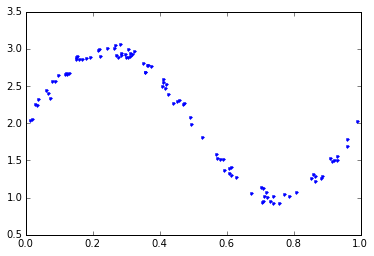

In [222]:
plt.plot(x, y,'.')

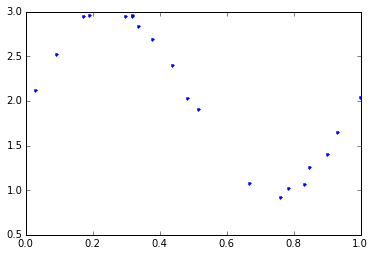

In [223]:
plt.plot(test_set_x, test_set_y,'.')

In [224]:
## Linear regression

In [316]:
def calc_hypo (parameters, x):
    hypo = parameters [0]
    powered_x = x
    for i in range(1, len(parameters)):
        hypo = hypo + powered_x * parameters[i]
        powered_x = powered_x * x
    return hypo

def linear_regression(xs, ys, num_param, alpha):
    parameters = [0] * num_param
    for iter in range(5000):
        for j in range(len(xs)):
            # calculate hyporthesis
            x = xs[j]
            hypo = calc_hypo (parameters, x)
        
            # update parameters
            powered_x = 1
            for i in range(len(parameters)): 
                parameters[i] = parameters[i] + alpha * (ys[j] - hypo) * powered_x 
                powered_x = powered_x * x
    
    return parameters

In [262]:
def error(test_set_x, test_set_y, parameters):
    error = 0
    for j in range(len(test_set_x)):
        hypo = calc_hypo (parameters, test_set_x[j])
        error =  error + np.power((hypo - test_set_y[j]), 2)
    return error/2   
    

In [274]:
## train model
best_polynome = 0
best_error = 100

for polynom in range(1, 25):
    parameters = linear_regression (x, y, polynom, 0.07)
    er = error (test_set_x, test_set_y, parameters)
    print er
    if er < best_error:
        best_error = er
        best_polynome = polynom

print best_polynome
print best_error

model = calc_hypo (parameters, x)

5.59006143583
2.32160893763
2.36525676347
0.114205807761
0.179395294443
0.28674645756
0.271803570358
0.165926748823
0.0772345393964
0.0479319214952
0.0548718153091
0.0712117768259
0.0850793229775
0.0929732354431
0.0945286361376
0.0908240034324
0.0836731460614
0.0750603562421
0.0666951826357
0.0597516404002
0.0547996746735
0.0518876690377
0.0507105112463
0.0507961777099
10
0.0479319214952


In [363]:
parameters = linear_regression (x, y, 10, 0.07)

x_sorted = np.arange(0,1,0.01)
model = calc_hypo (parameters, x_sorted)

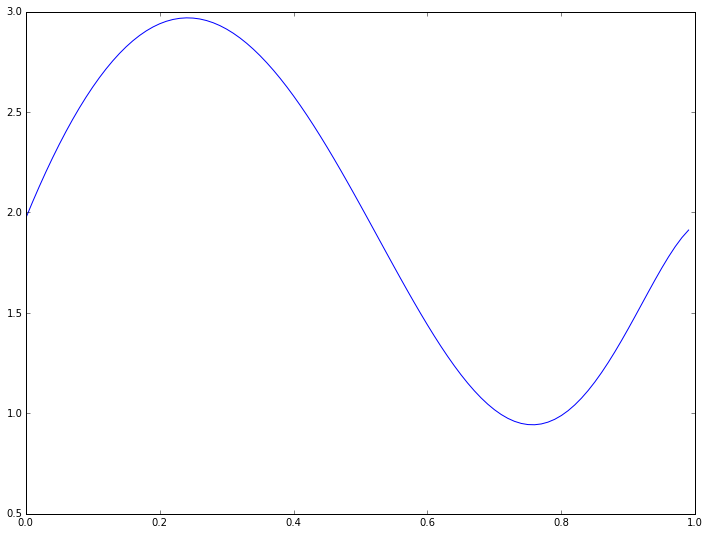

In [364]:
plt.plot(x_sorted, model, '-')

In [365]:
perfect_sine = 2 + np.sin(2 * np.pi * x_sorted)

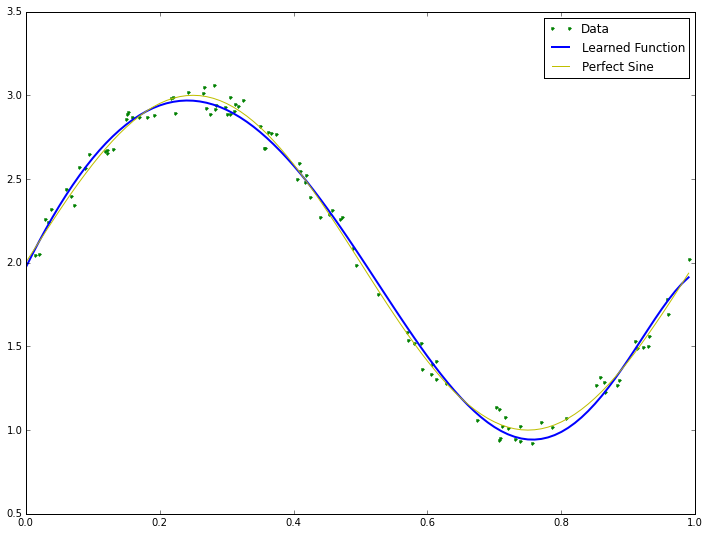

In [371]:
fig_size = [0,0]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

line1, = plt.plot(x, y, '.g', label="Data")
line2, = plt.plot(x_sorted, model, '-b', label="Learned Function", linewidth = 2)
line3, = plt.plot(x_sorted, perfect_sine, '-y', label="Perfect Sine")

# Create a legend for the first line.
first_legend = plt.legend(handles=[line1, line2, line3], loc=1)

In [367]:
print parameters


[1.9706930710601698, 8.1484541988167987, -15.631267998466003, -5.6583067985339355, 4.0912645916652908, 7.730313374619401, 6.6566191926397726, 2.9900782045759167, -1.7387427760712177, -6.6180444452923943]
